In [1]:
# initialize
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Square wave function
 $x(t) = {\rm sgn}(\sin(t/T)) = {\rm sgn}(\sin ft)$

In [2]:
T = 3.615
t = np.linspace(0, 30, 200)
# x = np.sign(np.sin(t*2*np.pi/T))
x = np.sign(np.sin(2*np.pi/T * t))

<IPython.core.display.Javascript object>


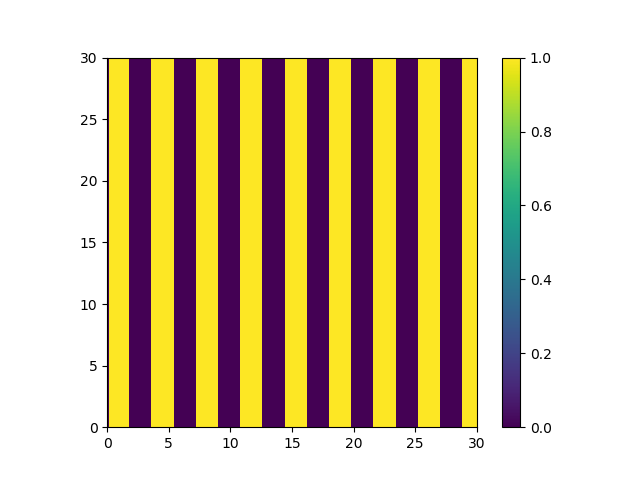

In [3]:
data = np.zeros((200,200))
data [:,x>0] = 1
plt.figure()
plt.imshow(data, origin='lower', extent=(0,30,0,30))
plt.colorbar()

<IPython.core.display.Javascript object>


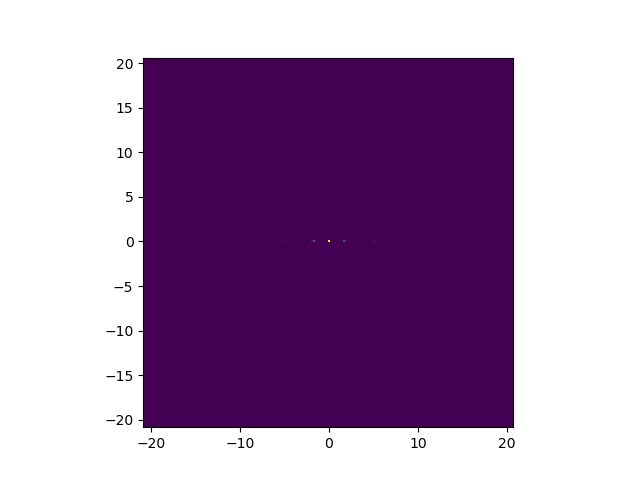

<IPython.core.display.Javascript object>


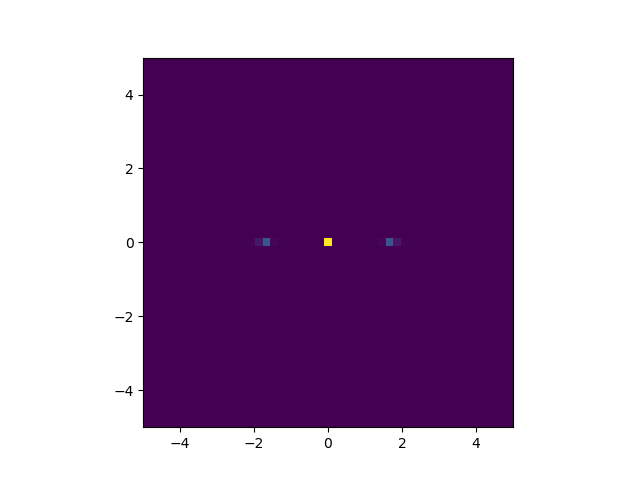

(-5, 5)

In [4]:
dummy = np.fft.fftn(data)
FT = np.fft.fftshift(dummy)
k = np.fft.fftfreq(200, d=t[2]-t[1])
q = np.fft.fftshift(k)*2*np.pi
Inten = abs(FT)**2
plt.figure()
plt.imshow(Inten, origin='lower', extent=(min(q),max(q),min(q),max(q)))
plt.figure()
plt.imshow(Inten, origin='lower', extent=(min(q),max(q),min(q),max(q)))
plt.xlim(-5,5)
plt.ylim(-5,5)

<IPython.core.display.Javascript object>


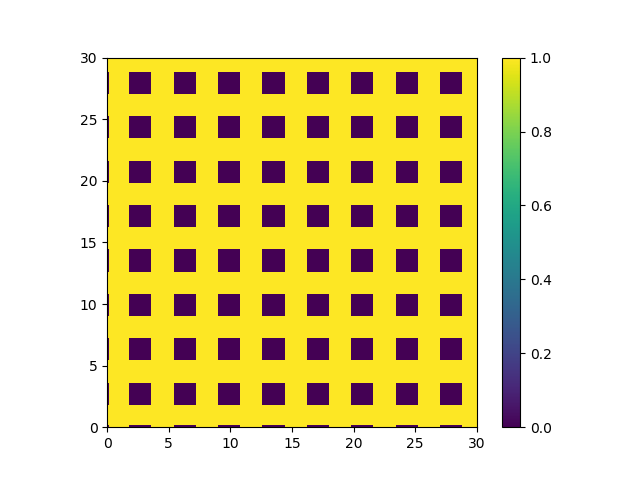

In [5]:
data = np.zeros((200,200))
data [:,x>0] = 1
data [x>0,:] = 1
plt.figure()
plt.imshow(data, origin='lower', extent=(0,30,0,30))
plt.colorbar()

<IPython.core.display.Javascript object>


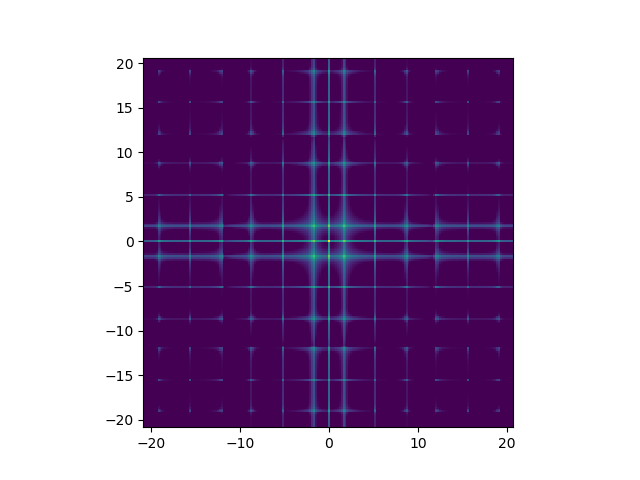

<IPython.core.display.Javascript object>


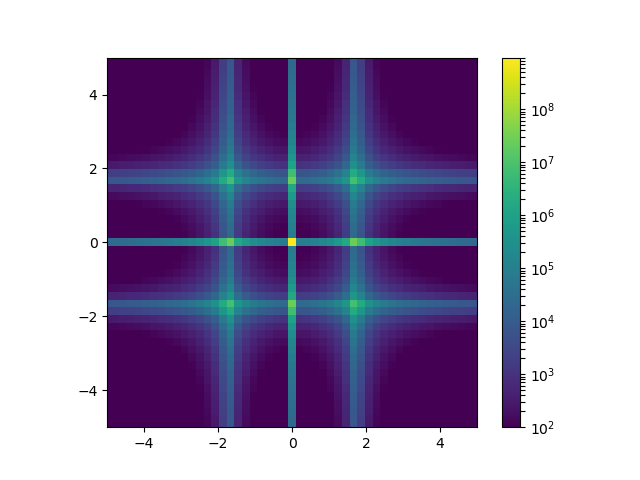

(-5, 5)

In [6]:
dummy = np.fft.fftn(data)
FT = np.fft.fftshift(dummy)
k = np.fft.fftfreq(200, d=t[2]-t[1])
q = np.fft.fftshift(k)*2*np.pi
Inten = abs(FT)**2

plt.figure()
plt.imshow(Inten, origin='lower', extent=(min(q),max(q),min(q),max(q)),norm=LogNorm(vmin=1e2))
plt.colorbar

plt.figure()
plt.imshow(Inten, origin='lower', extent=(min(q),max(q),min(q),max(q)),norm=LogNorm(vmin=1e2))
plt.colorbar()
plt.xlim(-5,5)
plt.ylim(-5,5)

# This is a validation

$x (\unicode{x212B}^{-1}) = x \frac{1}{10^{-10} \rm{m}}$